# Load and Summarize Lottery Data
This notebook loads the `lottery_data.csv` file as a pandas DataFrame and displays its summary.

In [3]:
import pandas as pd
df = pd.read_csv('datasets/lottery_data.csv')
df.head()

,number,date,prize_amount,draw_id,prize_category,day_name
0,22,2025-01-01,100,74771,7th prize,Wednesday
1,185,2025-01-01,100,74771,7th prize,Wednesday
2,312,2025-01-01,100,74771,7th prize,Wednesday
3,377,2025-01-01,100,74771,7th prize,Wednesday
4,568,2025-01-01,100,74771,7th prize,Wednesday


In [4]:
# Display DataFrame info and summary statistics
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65849 entries, 0 to 65848
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   number          65849 non-null  int64 
 1   date            65849 non-null  object
 2   prize_amount    65849 non-null  int64 
 3   draw_id         65849 non-null  int64 
 4   prize_category  65849 non-null  object
 5   day_name        65849 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.0+ MB


,number,date,prize_amount,draw_id,prize_category,day_name
count,65849.000000,65849,65849.000000,65849.000000,65849,65849
unique,NaN,211,NaN,NaN,8,7
top,NaN,2025-05-18,NaN,NaN,8th prize,Wednesday
freq,NaN,869,NaN,NaN,19602,10606
mean,4981.364470,NaN,837.238227,74888.806345,NaN,NaN
std,2886.007462,NaN,5016.603497,59.132582,NaN,NaN
min,0.000000,NaN,50.000000,74771.000000,NaN,NaN
25%,2480.000000,NaN,100.000000,74839.000000,NaN,NaN
50%,4995.000000,NaN,100.000000,74901.000000,NaN,NaN
75%,7481.000000,NaN,500.000000,74936.000000,NaN,NaN


## Histogram of the 'number' Column
Let's visualize the distribution of the `number` column (expected range: 0-9999) using a histogram.

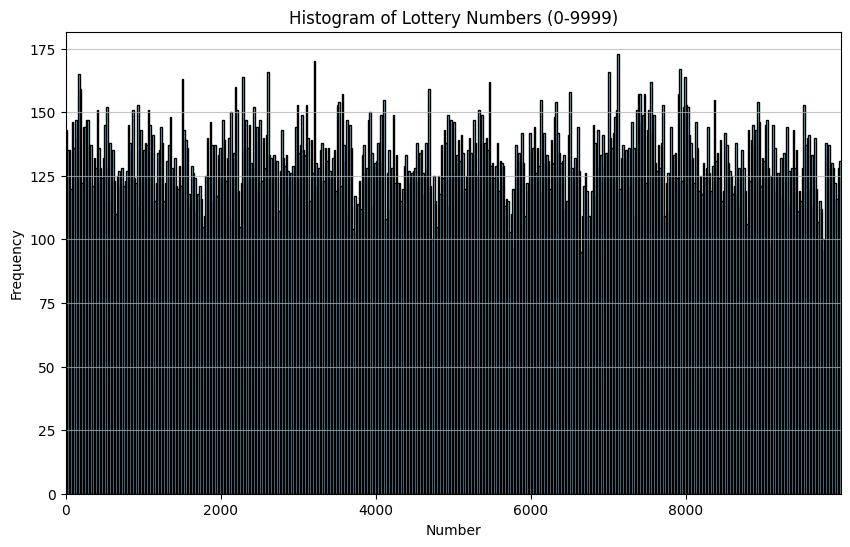

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df['number'], bins=500, color='skyblue', edgecolor='black')
plt.title('Histogram of Lottery Numbers (0-9999)')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.xlim(0, 9999)
plt.grid(axis='y', alpha=0.75)
plt.show()

## Find Missing Numbers in the 'number' Column
Let's identify which numbers from 0 to 9999 are not present in the `number` column.

In [10]:
all_numbers = set(range(10000))
present_numbers = set(df['number'])
missing_numbers = sorted(all_numbers - present_numbers)
print(f"Total missing numbers: {len(missing_numbers)}")
print("First 20 missing numbers:", missing_numbers[:20])

Total missing numbers: 19
First 20 missing numbers: [1475, 1907, 2715, 3193, 3922, 4350, 5764, 6243, 6493, 6738, 7163, 8219, 8734, 8776, 9092, 9199, 9541, 9777, 9930]


## Most Frequently Occurring Numbers
Let's find out which numbers in the `number` column have occurred the most.

In [11]:
top_counts = df['number'].value_counts().head(20)
print("Top 20 most frequently occurring numbers:")
print(top_counts)

Top 20 most frequently occurring numbers:
number
3526    18
3071    18
1410    17
7423    17
969     17
7014    16
7020    16
4225    16
414     16
1927    16
7802    16
4278    16
4041    16
3638    16
9666    16
4392    15
9572    15
4901    15
7679    15
2280    15
Name: count, dtype: int64


## Occurrences of Number 3526 by Date
Let's visualize how often the number 3526 has occurred over time and calculate the average number of days between its draws.

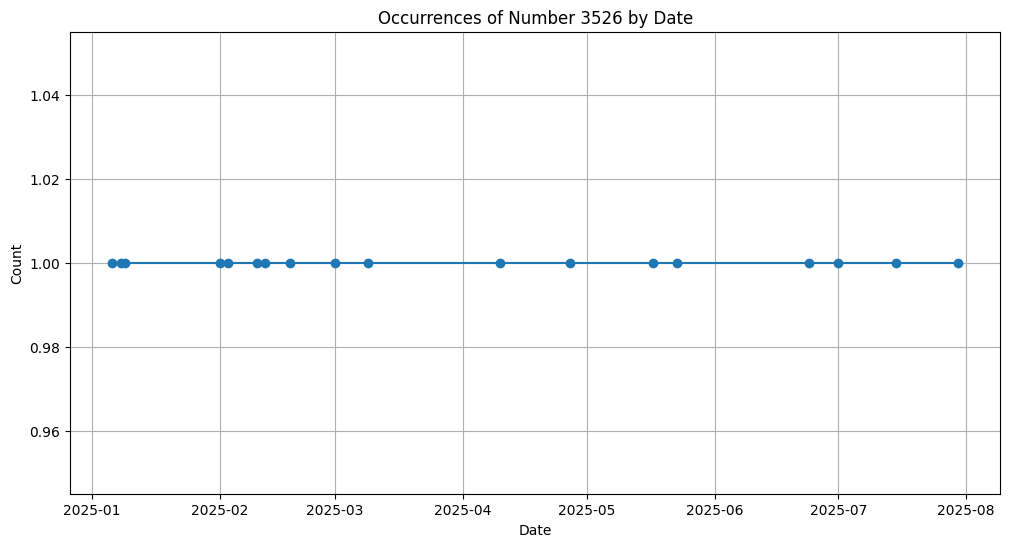

Average number of days between draws for 3526: 12.06


In [14]:
# Filter for number 3526
df_3526 = df[df['number'] == 3526].copy()
df_3526['date'] = pd.to_datetime(df_3526['date'])
df_3526_by_date = df_3526.groupby('date').size().reset_index(name='count')

# Plot occurrences by date
plt.figure(figsize=(12,6))
plt.plot(df_3526_by_date['date'], df_3526_by_date['count'], marker='o')
plt.title('Occurrences of Number 3526 by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Calculate average number of days between draws
if len(df_3526_by_date) > 1:
    days_between = df_3526_by_date['date'].diff().dt.days.dropna()
    avg_days = days_between.mean()
    print(f'Average number of days between draws for 3526: {avg_days:.2f}')
else:
    print('Number 3526 has only occurred once or not at all.')

## Range of Days Between Draws and Next Predicted Draws for 3526
Let's display the minimum and maximum gap (in days) between draws for 3526, and predict the next possible draw dates based on the last draw and the observed gaps.

In [15]:
# Calculate min, max, and average gap between draws for 3526
if len(df_3526_by_date) > 1:
    days_between = df_3526_by_date['date'].diff().dt.days.dropna()
    min_gap = days_between.min()
    max_gap = days_between.max()
    avg_gap = days_between.mean()
    print(f"Gap between draws for 3526: min={min_gap} days, max={max_gap} days, avg={avg_gap:.2f} days")
    
    # Predict next possible draw dates based on last date and observed gaps
    last_date = df_3526_by_date['date'].max()
    print("\nNext possible draw dates for 3526 (based on observed gaps):")
    for gap in sorted(set(days_between))[:5]:
        next_date = last_date + pd.Timedelta(days=gap)
        print(f"  {next_date.date()} (gap: {gap} days)")
else:
    print('Number 3526 has only occurred once or not at all.')

Gap between draws for 3526: min=1.0 days, max=32.0 days, avg=12.06 days

Next possible draw dates for 3526 (based on observed gaps):
  2025-07-31 (gap: 1.0 days)
  2025-08-01 (gap: 2.0 days)
  2025-08-05 (gap: 6.0 days)
  2025-08-06 (gap: 7.0 days)
  2025-08-07 (gap: 8.0 days)
